In [13]:
import cv2
from matplotlib import pyplot as plt

Working


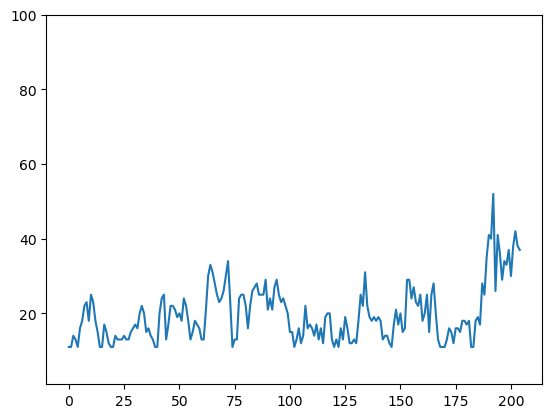

In [17]:
face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
counter = 0

def save_data(frame, folder, user_id, count):
    '''Save jpg cropped image of detected face. Only used by the face_detect function. 
    count: the number of this frame
    frame: input cropped grayscale image 
    '''
    cv2.imwrite(f'{folder}/{user_id}_{count}.jpg', frame)

def face_detect(frame, width, height, folder, user_id):
    '''
    Take a normal RGB frame, convert to grayscale frame and feed to the model.
    Input:
        frame: frame read from cv2 VideoCapture
        int width: bounding box min width. Prefer measuring proportionally to the orginal input frame
        int height: bounding box min height. Prefer measuring proportionally to the orginal input frame
        str folder: folder name. Will be changed to the database name
        str user_id: user id, standardized later. Currently user name.

    Output:
        detectMultiScale2 object, coordinates of the bounding box with the following structure [(x, y, width, height), (confidence_level)]
    '''
    global face_cascade, counter
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    hist_gray = cv2.equalizeHist(gray)

    faces = face_cascade.detectMultiScale2(
                                hist_gray,
                                scaleFactor=1.05,
                                minNeighbors=10,
                                minSize=(width,height)
                            )
    
    #save image if confidence is high
    confidence_level = faces[1][0] if any(faces[1]) else 0
    status = True if confidence_level >= 30 else False #confidence level can be changed. Though currently 30 is quite high

    if status:
        counter+=1
        save_data(frame=gray[y:y+h, x:x+w], folder=folder, user_id=user_id, count=counter)
        

    return faces

video = cv2.VideoCapture(0)

#get width and height based on the setting of the user camera
width = int(video.get(3))
height = int(video.get(4))

video.set(3, width)
video.set(4, height)

#save video for testing. This video saving feature will be eradicated in the web (no need)
out = cv2.VideoWriter(
    'out.avi',
    cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'),
    30,
    (width, height)
    )

if not video.isOpened():
    print('Camera failure!')
    exit()
else:
    print('Processing...')

y_ax = [] #draw confidence plot ------
while True:
    ret, normal_frame = video.read()
    
    faces = face_detect(
                frame=normal_frame,
                width=int(width*0.37),
                height=int(height*0.5),
                folder='data',
                user_id='TruongHaoNhien'
            )
    
    #draw bounding box
    for (x, y, w, h) in faces[0]:
        cv2.rectangle(normal_frame,(x,y),(x+w,y+h),(255,0,0),2)

        #draw confidence plot ------
        confidence=faces[1]
        y_ax.append(confidence[0])

    #save video
    out.write(normal_frame)

    cv2.imshow('Camera', normal_frame)

    if counter == 20: #specify how many images are sufficient
        break

plt.plot(range(len(y_ax)), y_ax)
plt.ylim(1,100)
plt.show()

video.release()
out.release()
cv2.destroyAllWindows()